In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
motor_data = pd.read_csv('./unitree/data/go1.csv', index_col=0)

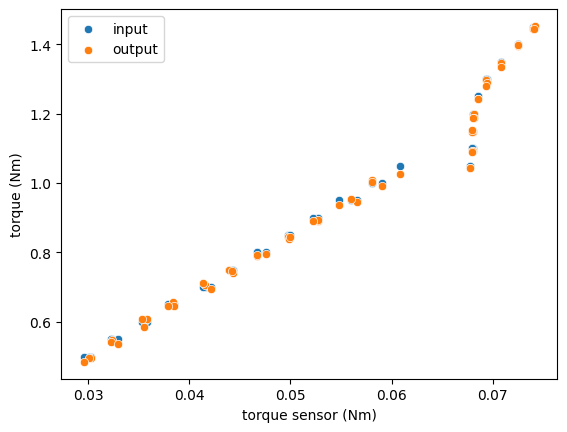

In [40]:
motor_data['torque_sensor'] = motor_data['voltage'].apply(lambda x: x  / 0.4509 * 22.6)
sns.scatterplot(data=motor_data, x='torque_sensor', y='input_torque')
sns.scatterplot(data=motor_data, x='torque_sensor', y='output_torque')
plt.ylabel('torque (Nm)')
plt.xlabel('torque sensor (Nm)')
plt.legend(['input', 'output'])
plt.show()

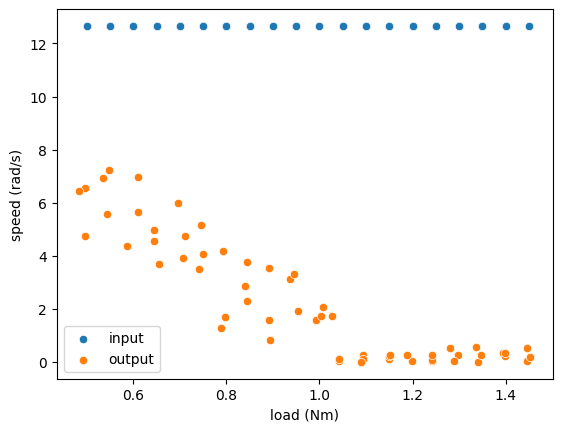

In [26]:
motor_data['output_speed'] = abs(motor_data['output_speed'])
sns.scatterplot(data=motor_data, x="input_torque", y='input_speed')
sns.scatterplot(data=motor_data, x="output_torque", y='output_speed')
plt.legend(labels=['input', 'output'])
plt.ylabel('speed (rad/s)')
plt.xlabel('load (Nm)')
plt.show()

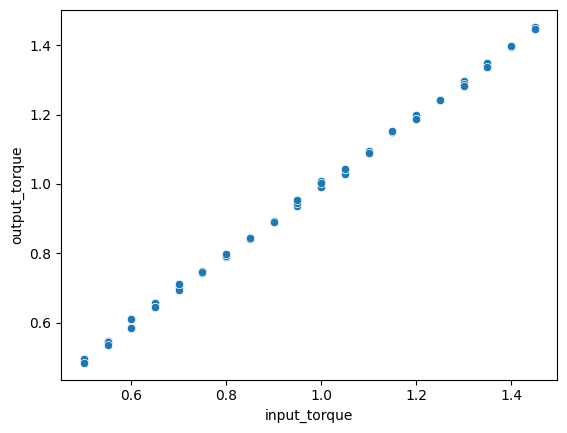

In [25]:
sns.scatterplot(data=motor_data, x="input_torque", y='output_torque')
plt.show()

,input_speed,input_torque,voltage,output_speed,output_torque,temp
0,12.66,0.50,0.000604,-4.736940,0.496094,26
1,12.66,0.50,0.000601,-6.553180,0.496094,26
2,12.66,0.50,0.000590,-6.455010,0.484375,26
3,12.66,0.55,0.000647,-7.215860,0.546875,26
4,12.66,0.55,0.000643,-5.571430,0.542969,26
5,12.66,0.55,0.000658,-6.945880,0.535156,26
6,12.66,0.60,0.000716,-5.645060,0.609375,26
7,12.66,0.60,0.000710,-4.368790,0.585938,26
8,12.66,0.60,0.000704,-6.970430,0.609375,26
9,12.66,0.65,0.000767,-3.681560,0.656250,26
